In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from snmfem.experiments import load_samples, print_results, load_data, run_experiment
# from snmfem.measures import KL


In [6]:
def create_toy_problem(l = 25, k = 3, p = 100, c = 10, n_poisson=200, force_simplex=True):

    A = np.random.rand(k,p)
    if force_simplex:
        A = A/np.sum(A, axis=0, keepdims=True)
    
    G = np.random.rand(l,c)
    P = np.random.rand(c,k)
    GP = G @ P

    X = GP @ A

    Xdot = 1/n_poisson * np.random.poisson(n_poisson * X)

    return G, P, A, X, Xdot

In [ ]:
dataset = "dataset_toy.json"
n_sample = 0
samples, k, g, model = load_samples(dataset)
sample = samples[n_sample]

Xflat, true_spectra, true_maps, G, shape_2d = load_data(sample)
Xtrue = true_spectra.T @ true_maps

In [ ]:
shape_2d = [6, 10]
k = 5
n_poisson = 30
G, P, true_maps, Xtrue, Xflat = create_toy_problem(p = shape_2d[0]*shape_2d[1], k=k, n_poisson=n_poisson)
true_spectra = (G @ P).T



In [ ]:
# G = None

In [ ]:
maxit = 10
tol = 1e-7

In [ ]:
# for me random was the best initialization...
default_params = {
    "n_components" : k,
    "tol" : tol,
    "max_iter" : maxit,
    "init" : "random",
    "random_state" : 1,
    "verbose" : 1
    }

params_snmf = {
    "force_simplex" : True,
    "skip_G" : False,
    "mu": 0
}

params_evalution = {
    "u" : True,
}

# All parameters are contained here
exp = {"name": "snmfem smooth 30", "method": "SmoothNMF", "params": {**default_params, **params_snmf, "lambda_L" : 0}}

m, (GP, A), loss  = run_experiment(Xflat, true_spectra, true_maps, G, exp, params_evalution,shape_2d)


In [ ]:
print(KL(Xflat, Xtrue, average=True))
print(KL(Xflat, GP @ A, average=True))
print(KL(Xtrue, GP @ A, average=True))

In [ ]:
# for me random was the best initialization...
default_params = {
    "n_components" : k,
    "tol" : tol,
    "max_iter" : maxit,
    "init" : "random",
    "random_state" : 1,
    "verbose" : 1
    }

params_snmf = {
    "force_simplex" : False,
    "skip_G" : False,
    "mu": 0
}

params_evalution = {
    "u" : True,
}

# All parameters are contained here
exp = {"name": "snmfem smooth 30", "method": "SmoothNMF", "params": {**default_params, **params_snmf, "lambda_L" : 0}}

m2, (GP2, A2), loss2  = run_experiment(Xflat, true_spectra, true_maps, G, exp, params_evalution,shape_2d)



In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for i,  l in enumerate([loss, loss2]):
    names = list(l.dtype.names)
    values = np.array([list(e) for e in l])

    # axes[0].plot(values[:,1:-2], markersize=3.5)
    axes[i,0].plot(values[:,1],'b',markersize=3.5)
    axes[i,0].plot(values[:,0],'r--',markersize=3.5)
    # axes[i,0].plot(values[:,-1],'g-',markersize=3.5)
    axes[i,0].set_yscale("log")
    axes[i,0].set_xlabel("number of iterations")
    # axes[0].legend(names[1:-2] + [names[0]])
    axes[i,0].legend([names[1]] + [names[0]])
    # axes[i,0].legend([names[1]] + [names[0]] +[names[-1]])
    axes[i,0].set_title("Losses")

    axes[i,1].plot(values[:,4:6], markersize=3.5)
    axes[i,1].legend(names[4:6])
    axes[i,1].set_xlabel("number of iterations")
    axes[i,1].set_title("Evolution of A and P")
    axes[i,1].set_yscale("log")

fig.tight_layout()

In [ ]:
# Ploting parameters
fontsize = 15
aspect_ratio = 3/4
scale = 20
cmap = plt.cm.gist_heat_r
vmin = 0
vmax = np.max(true_maps)

In [ ]:
metric = np.array(m[:-1])
order = np.array(m[-1])

fig, axes = plt.subplots(k,3,figsize = (scale, scale/3*k * aspect_ratio))


for j in range(k):
    ind = np.arange(k)[order[0,j]]
    axes[j, 0].plot(true_spectra[j],'bo',label='truth',linewidth=4)
    axes[j, 0].plot(GP[:,ind] ,'r-',label='reconstructed',markersize=3.5)
    axes[j, 0].set_title("{:.2f} deg".format(metric[0,j]))

for j in range(k):
    ind = np.arange(k)[order[1,j]]
    axes[j, 1].imshow(A[ind].reshape(*shape_2d), vmin=vmin, vmax=vmax, cmap=cmap)
    axes[j, 1].set_title("Mse: {:.2f}".format(metric[1,j]))
    axes[j, 2].imshow(true_maps[j].reshape(*shape_2d), vmin=vmin, vmax=vmax, cmap=cmap)   
    
rows = ['Phase {}'.format(col) for col in range(k)]
cols = ["Phase", "Map", "Real map"]

for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontsize=fontsize)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, fontsize=fontsize)

fig.tight_layout()

plt.show()


In [ ]:
metric = np.array(m2[:-1])
order = np.array(m2[-1])

fig, axes = plt.subplots(k,3,figsize = (scale, scale/3*k * aspect_ratio))


for j in range(k):
    ind = np.arange(k)[order[0,j]]
    axes[j, 0].plot(true_spectra[j],'bo',label='truth',linewidth=4)
    axes[j, 0].plot(GP2[:,ind] ,'r-',label='reconstructed',markersize=3.5)
    axes[j, 0].set_title("{:.2f} deg".format(metric[0,j]))

for j in range(k):
    ind = np.arange(k)[order[1,j]]
    axes[j, 1].imshow(A2[ind].reshape(*shape_2d), vmin=vmin, vmax=vmax, cmap=cmap)
    axes[j, 1].set_title("Mse: {:.2f}".format(metric[1,j]))
    axes[j, 2].imshow(true_maps[j].reshape(*shape_2d), vmin=vmin, vmax=vmax, cmap=cmap)   
    
rows = ['Phase {}'.format(col) for col in range(k)]
cols = ["Phase", "Map", "Real map"]

# for ax, col in zip(axes[0], cols):
#     ax.set_title(col, fontsize=fontsize)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, fontsize=fontsize)

fig.tight_layout()

plt.show()


In [ ]:
names

# Other stuff

In [ ]:
from pyunlocbox import functions
from pyunlocbox.solvers import mlfbf, solve
from snmfem.conf import log_shift
# Let us solve the following problem
# 
# \argmin_P  - \sum_ij  X_ij log(GPA)_ij + (GPA)_ij  s.t. P \geq 0

# \argmin_A  - \sum_ij  X_ij log(GPA)_ij + (GPA)_ij + f(A) s.t. A \geq 0


# class smooth(functions.func):
#     def __init__(self, G, A):
#         self.A = A
#         self.G = G
#         self.nabla = np.sum(self.G.T, axis=1, keepdims=True) @ np.sum(self.A.T, axis=0, keepdims=True)

#     def _eval(self, P):
#         return np.sum(self.G @ P @ self.A)
#     def _grad(self, P):
#         return self.nabla

# f_smooth = smooth(G, A)
# assert(f_smooth.grad(P).shape == P.shape)
# np.testing.assert_allclose(f_smooth.grad(P),f_smooth.grad(2*P))


class mxlogvpv(functions.func):
    def __init__(self, X, lambda_=1, log_shift=log_shift, **kwargs):
        super(mxlogvpv, self).__init__(**kwargs)
        self.lambda_ = lambda_
        self.X = X
        self.log_shift = log_shift
        self.offset = np.sum(self.X * np.log(self.X+log_shift)) - np.sum(self.X)

    def _eval(self, P):
        return self.offset * (self.offset - self.lambda_ * np.sum(self.X * np.log(P+log_shift)) + np.sum(P))
    def _prox(self, P, T):
        gamma = self.lambda_ * T
        delta = (P - gamma)**2 + 4 * gamma * self.X
        return (P-gamma + np.sqrt(delta))/2

def solve_P(G, A, X, **kwargs):
    L = lambda P : G @ P @ A
    Lt = lambda X: G.T @ X @ A.T 

    f = functions.proj_positive()
    g = mxlogvpv(X)
    h = functions.dummy()
    beta = 0
    mu = beta + np.linalg.norm(G,2) * np.linalg.norm(A,2)
    step = 1 / mu / 2

    x0 = np.zeros(P.shape)
    D = np.linalg.lstsq(A.T, X.T)[0].T
    x0 = np.abs(np.linalg.lstsq(G, D)[0])
    d0 = np.zeros(X.shape)

    solver = mlfbf(step=step, L=L, Lt=Lt, d0=d0 )
    ret = solve([f, g, h], x0, solver, **kwargs)

    sol = ret["sol"], np.array(ret["objective"]).sum(axis=1)
    return sol

def solve_A(G, P, X, **kwargs):
    GP = G @ P
    L = lambda A : GP @ A
    Lt = lambda X: GP.T @ X
    
    n = GP.shape[1]
    opA = lambda A: np.sum(A, 0, keepdims=True)
    opAt = lambda V: np.ones([n,1]) @ V
    y = np.ones([1, X.shape[1]])

    f = functions.proj_positive()
    g = mxlogvpv(X)
    h = function.norm_l2(A=OpA, At=OpAt, y=y)
    beta = 0
    mu = beta + np.linalg.norm(G,2) * np.linalg.norm(A,2)
    step = 1 / mu / 2

    x0 = np.zeros(P.shape)
    D = np.linalg.lstsq(A.T, X.T)[0].T
    x0 = np.abs(np.linalg.lstsq(G, D)[0])
    d0 = np.zeros(X.shape)

    solver = mlfbf(step=step, L=L, Lt=Lt, d0=d0 )
    ret = solve([f, g, h], x0, solver, **kwargs)

    sol = ret["sol"], np.array(ret["objective"]).sum(axis=1)
    return sol

In [ ]:
sol,  objective = solve_P(G, A, X, maxit=1000, rtol=1e-15)

plt.plot(objective)
plt.yscale("log")

np.linalg.norm(sol - P, "fro") / np.linalg.norm(P, "fro"), KLdiv(X, G @ sol, A)

In [ ]:
# D = np.linalg.lstsq(A.T, Xdot.T)[0].T
# x0 = np.abs(np.linalg.lstsq(G, D)[0])
# D, np.linalg.lstsq(G, D)[0]

In [ ]:
sol,  objective = solve_P(G, A, Xdot, maxit=100, rtol=1e-15)

plt.plot(objective)
# plt.yscale("log")

np.linalg.norm(sol - P, "fro") / np.linalg.norm(P, "fro"), KLdiv(X, G @ sol, A)

In [ ]:
sol

In [ ]:
from pyunlocbox import functions


In [ ]:
est = NMF(G=G, n_components=k, debug=True, max_iter=200,  force_simplex=True)

In [ ]:
Ps, As = est.fit_transform(X, eval_print=20)

In [ ]:
# est = NMF(G=G, n_components=k, debug=True, max_iter=2000, force_simplex=False)
# Pss, Ass = est.fit_transform(Xdot, eval_print=200)
# Ainit = Ass/np.sum(Ass, axis=0, keepdims=True)
        # - 'random': non-negative random matrices, scaled with:
        #     sqrt(X.mean() / n_components)
        # - 'nndsvd': Nonnegative Double Singular Value Decomposition (NNDSVD)
        #     initialization (better for sparseness)
        # - 'nndsvda': NNDSVD with zeros filled with the average of X
        #     (better when sparsity is not desired)
        # - 'nndsvdar': NNDSVD with zeros filled with small random values
        #     (generally faster, less accurate alternative to NNDSVDa
        #     for when sparsity is not desired)
est = NMF(G=G, n_components=k, debug=True, mu=0, max_iter=2000,tol=0, force_simplex=False, init="nndsvd")
Pss, Ass = est.fit_transform(Xdot, eval_print=200)
# np.sum(Ass, axis=0)

In [ ]:
# est = NMF(G=G, n_components=k, debug=True, max_iter=10, force_simplex=True)
# Pss, Ass = est.fit_transform(Xdot, A=A, eval_print=1)

In [ ]:
vmin = 0
vmax = 1

plt.subplot(2,1,1)
plt.imshow(A, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.subplot(2,1,2)
plt.imshow(Ass, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.show()

In [ ]:
np.min(Ass)

In [ ]:
k = 15
num = np.random.rand(k,23)/20
denum = np.random.rand(k,23)

def f(nu):
    sol = 0
    for n,d in zip(num, denum):
        sol = sol + n/(d+nu)
    return sol - 1

In [ ]:
r = np.sum(num/denum, axis=0)
# t = np.sum(num)
# if r<1:
#     bmax = 0
# else:
ind_min = np.argmax(num/denum, axis=0)
ind_min2 = np.argmin(denum, axis=0)
ind = np.arange(len(ind_min))

bmin1 = num[ind_min, ind]-denum[ind_min, ind]
bmin2 = num[ind_min2, ind]-denum[ind_min2, ind]
bmin = np.maximum(bmin1, bmin2)
bmax = r

# nu = np.arange(bmin, bmax, 1e-3)
# plt.plot(nu, f(nu))
# plt.show()

In [ ]:
bmin, bmax

In [ ]:
bmin

In [ ]:
ind_max = np.argmin(num/denum)
num[ind_max]/denum[ind_max]

In [ ]:
"""
Implements three algorithms for projecting a vector onto the simplex: sort, pivot and bisection.
For details and references, see the following paper:
Large-scale Multiclass Support Vector Machine Training via Euclidean Projection onto the Simplex
Mathieu Blondel, Akinori Fujino, and Naonori Ueda.
ICPR 2014.
http://www.mblondel.org/publications/mblondel-icpr2014.pdf
"""

# To check for exact projection
# https://github.com/RoyiAvital/StackExchangeCodes/blob/master/Mathematics/Q2327504/ProjectSimplexExact.m

import numpy as np


def projection_simplex_sort(v, z=1):
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w


def projection_simplex_pivot(v, z=1, random_state=None):
    rs = np.random.RandomState(random_state)
    n_features = len(v)
    U = np.arange(n_features)
    s = 0
    rho = 0
    while len(U) > 0:
        G = []
        L = []
        k = U[rs.randint(0, len(U))]
        ds = v[k]
        for j in U:
            if v[j] >= v[k]:
                if j != k:
                    ds += v[j]
                    G.append(j)
            elif v[j] < v[k]:
                L.append(j)
        drho = len(G) + 1
        if s + ds - (rho + drho) * v[k] < z:
            s += ds
            rho += drho
            U = L
        else:
            U = G
    theta = (s - z) / float(rho)
    return np.maximum(v - theta, 0)


def projection_simplex_bisection(v, z=1, tau=0.0001, max_iter=1000):
    lower = 0
    upper = np.max(v)
    current = np.inf

    for it in range(max_iter):
        if np.abs(current) / z < tau and current < 0:
            break

        theta = (upper + lower) / 2.0
        w = np.maximum(v - theta, 0)
        current = np.sum(w) - z
        if current <= 0:
            upper = theta
        else:
            lower = theta
    return w

n = 10
rs = np.random.RandomState(0)
v = rs.rand(n)
z = 1
print(z)

w1 = projection_simplex_sort(v, z)
print(np.sum(w1))

w2 = projection_simplex_pivot(v, z)
print(np.sum(w2))

w3 = projection_simplex_bisection(v, z)
print(np.sum(w3))

In [ ]:
Aop = lambda x : np.sum(x)
pinvA = np.linalg.pinv(np.ones([1,n]))
pinvAop = lambda x: 1/n * x

def mysolution(x):
    return x - pinvAop(Aop(x) - 1)
mysolution(v)

In [ ]:
# some plots

# Divergence de Bregman

In [ ]:
def f(x):
    return 0.5*(x - 2)**2

def nablaf(x):
    return (x - 2)

def f(x):
    return np.abs(x - 2)

def nablaf(x):
    return np.sign(x - 2)

def bregman_div(f, nablaf, xt, x):
    fxt = f(xt)
    fx = f(x)
    nablafxt = nablaf(xt)
    return fx - fxt - nablafxt * (x - xt)

In [ ]:
x = np.arange(-10,10, 0.1)
xt = -2
fx = f(x)
vmin = np.min(fx)
vmax = np.max(fx)
plt.plot(x, fx, label="f(x)")
plt.plot(x, bregman_div(f, nablaf, xt, x), label="Bregman divergence of f(x) at xt={}".format(xt))
plt.plot([xt, xt], [vmin, vmax], label="xt")
plt.ylim([vmin, vmax])
plt.legend(loc=1)

In [ ]:
from snmfem.updates import update_q, multiplicative_step_pq, multiplicative_step_p, multiplicative_step_a
from snmfem.conf import log_shift, dicotomy_tol
from snmfem.measures import KL, trace_xtLx
from snmfem.laplacian import create_laplacian_matrix, sigmaL

In [ ]:
dataset = "dataset_toy.json"
n_sample = 0
samples, k, g, model = load_samples(dataset)
sample = samples[n_sample]

X, GPt, A, G, shape_2d = load_data(sample)
Xtrue = true_spectra.T @ true_maps
P, _, _, _ = np.linalg.lstsq(G, GPt.T, rcond=None)
G.shape, P.shape, A.shape



In [ ]:
# shape_2d = [10, 6]
# k = 5
# n_poisson = 30
# G, P, A, Xtrue, X = create_toy_problem(p = shape_2d[0]*shape_2d[1], k=k, n_poisson=n_poisson)
# GP = G @ P)

In [ ]:
plt.figure(figsize=(15, 3))
for i in range(k):
    plt.subplot(1,5,i+1)
    plt.imshow(A[i].reshape(shape_2d), vmin=0.1, vmax=0.5, cmap=plt.cm.gist_heat_r)

In [ ]:
P2 = multiplicative_step_pq(Xtrue, G, P, A, eps=0, safe=True)
np.testing.assert_allclose(P, P2)

P3 = multiplicative_step_pq(X, G, P, A, safe=True)
P4 = multiplicative_step_p(X, G, P, A, safe=True)
np.testing.assert_allclose(P3, P4)



In [ ]:

def multiplicative_step_aq(X, G, P, A, force_simplex=True, eps=log_shift, safe=True, dicotomy_tol=dicotomy_tol, lambda_L=0, L=None, sigmaL=sigmaL):
    """
    Multiplicative step in A.
    """
    if not(lambda_L==0):
        if L is None:
            raise ValueError("Please provide the laplacian")

    if safe:
        # Allow for very small negative values!
        assert(np.sum(A<-log_shift/2)==0)
        assert(np.sum(P<-log_shift/2)==0)
        assert(np.sum(G<-log_shift/2)==0)

    GP = G @ P # Also called D
    GPA = GP @ A

    c = A * (GP.T @ (X / (GPA+eps)))

    b = np.sum(GP, axis=0, keepdims=True).T 
    if not(lambda_L==0):
        b = b + lambda_L * A @ L - lambda_L * sigmaL  * A 
        a = lambda_L * sigmaL
        if force_simplex:
            nu = dichotomy_simplex_q(a, b, c)
            b = b + nu
        return (-b + np.sqrt(b**2 + 4* a *c)) / (2*a)
    else: 
        if force_simplex:
            nu = dichotomy_simplex(num, denum,dicotomy_tol)
            b = b + nu
        return c / b


In [ ]:
def smooth_l2_surrogate(At, A=None, sigmaL=sigmaL, lambda_L=1):
    tmp = (At @ L)
    t1 = np.sum(At * tmp)
    if not(A is None):
        t2 = np.sum(A * tmp)
        t3 = np.sum((At-A)**2)
    else:
        t2 = t1
        t3 = 0
    return lambda_L / 2 * (2*t2 -t1 + sigmaL * t3)

def diff_surrogate(At, A, sigmaL=sigmaL, lambda_L=1):
    b_inf = trace_xtLx(L, A.T) * lambda_L / 2
    b_supp = smooth_l2_surrogate(At, A=A, sigmaL=sigmaL, lambda_L=lambda_L)
    return b_supp - b_inf
    
L = create_laplacian_matrix(4, 3)
for i in range(10):
    A1 = np.random.randn(3, 12)
    v1 = smooth_l2_surrogate(A1)
    v2 = smooth_l2_surrogate(A1, A1)
    v3 = trace_xtLx(L, A1.T) / 2
    np.testing.assert_almost_equal(v1, v2)
    np.testing.assert_almost_equal(v1, v3)

    for j in range(10):
        A2 = np.random.randn(3, 12)
        v4 = smooth_l2_surrogate(A1, A2)
        v5 = trace_xtLx(L, A2.T) / 2
        assert v4 >= v5
        d = diff_surrogate(A1, A2, sigmaL=sigmaL)
        np.testing.assert_almost_equal(v4 - v5 , d)

    
    

In [ ]:


G, P, A, Xtrue, X = create_toy_problem(p = shape_2d[0]*shape_2d[1], k=k, n_poisson=n_poisson)

P1 = np.random.rand(*P.shape)
A1 = np.random.rand(*A.shape)
P2 = P1.copy()
A2 = A1.copy()

P3 = P1.copy()
A3 = A1.copy()
P0 = P1.copy()
A0 = A1.copy()

L = create_laplacian_matrix(*shape_2d)

lambda_L = 10

def loss(P, A):
    DA = G @ P @ A
    v1 = KL(X, DA) 
    v2 = trace_xtLx(L, A.T)
    return v1 + lambda_L/2 * v2

maxit = 100
force_simplex = False
loss0 = [loss(P0, A0)]

loss1 = [loss(P1, A1)]
loss2 = [loss(P2, A2)]
diff_loss2 = []
loss3 = [loss(P3, A3)]
diff_loss3 = []

# gamma2 = sigmaL
gamma2 = 0.2
gamma3 = sigmaL
# gamma3 = 0.005
gamma3_vec = [gamma3]
d3 = []

for i in range(maxit):
    A0 = multiplicative_step_a(X, G, P0, A0, force_simplex=force_simplex, lambda_L=lambda_L, L=L)
    P0 = multiplicative_step_p(X, G, P0, A0)
    loss0.append(loss(P0, A0))
    
    A1 = multiplicative_step_aq(X, G, P1, A1, force_simplex=force_simplex, lambda_L=lambda_L, L=L)
    P1 = multiplicative_step_p(X, G, P1, A1)
    loss1.append(loss(P1, A1))

    
    A2 = multiplicative_step_aq(X, G, P2, A2, force_simplex=force_simplex, lambda_L=lambda_L, L=L, sigmaL=gamma2)
    diff_loss2.append(loss2[-1]-loss(P2, A2))

    P2 = multiplicative_step_p(X, G, P2, A2)
    loss2.append(loss(P2, A2))
    A3_old = A3.copy()
    A3 = multiplicative_step_aq(X, G, P3, A3, force_simplex=force_simplex, lambda_L=lambda_L, L=L, sigmaL=gamma3)
    d3.append(diff_surrogate(A3_old, A3, sigmaL=gamma3))
    diff_loss3.append(d3)
    if d3[-1]>0:
        gamma3 = gamma3 / 1.2
    else:
        gamma3 = gamma3 * 1.5
    gamma3_vec.append(gamma3)
        
    P3 = multiplicative_step_p(X, G, P3, A3)
    loss3.append(loss(P3, A3))
    

In [ ]:
gamma3

In [ ]:
for i in range(10*maxit):
    A2 = multiplicative_step_aq(X, G, P2, A2, force_simplex=force_simplex, lambda_L=lambda_L, L=L, sigmaL=gamma2)
    P2 = multiplicative_step_p(X, G, P2, A2)

l_infty = loss(P2, A2)

In [ ]:
iterations = np.arange(maxit+1)+1
plt.plot(iterations, np.array(loss0)-l_infty, "kx-", label="KL surrogate")
plt.plot(iterations, np.array(loss1)-l_infty, "bx-", label="L2 surrogate - theoretical step")
plt.plot(iterations, np.array(loss2)-l_infty, "rx-", label="L2 surrogate - optimal fixed step")
plt.plot(iterations, np.array(loss3)-l_infty, "gx-", label="L2 surrogate - linesearch")
plt.yscale("log")
plt.xscale("log")
plt.legend()


In [ ]:
plt.plot(gamma3_vec, ".-")
plt.yscale("log")
plt.title("Evolution of the step size")


In [ ]:
gamma3

In [ ]:
def f(x, a, b, c):
    v = x + b
    return v - np.sqrt( v**2 + 4*a*c) +2*a 
p = 1
x = np.arange(-2,2, 0.1)
a = np.random.rand(p)
a = 0.5
b = np.random.rand(p)
c = np.random.rand(p)
plt.plot(x, f(x,a,b,c))
plt.plot(x, np.zeros_like(x))

In [3]:
l = 10
k = 100
p = 200
c = 3
n_poisson=200
E0 = 150

In [4]:
A = np.random.rand(c,p)
A = A/np.sum(A, axis=0, keepdims=True)
G1 = np.random.rand(k, l-2)
E = np.arange(1,k+1,1)*E0/k
t1 = (E0-E) / E 
t2 = (E0-E)**2 /E /E0
G2 = np.array([t1,t2]).T
G = np.concatenate([G1,G2], axis=1)
P = np.random.rand(l,c)
GP = G @ P

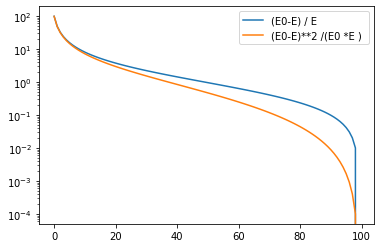

In [5]:
plt.plot(G2)
# plt.legend(["(E0-E) / E ", "(E0-E)**2 /E "])
plt.legend(["(E0-E) / E ", "(E0-E)**2 /(E0 *E ) "])
plt.yscale("log")

In [6]:
def create_toy_problem_G_constraint(l = 10, k = 100, p = 200, c = 3, n_poisson=200, E0 = 30, force_simplex=True):

    A = np.random.rand(c,p)
    if force_simplex:
        A = A/np.sum(A, axis=0, keepdims=True)
    assert(l>=2)
    G1 = np.random.rand(k, l-2)
    E = np.arange(1,k+1,1)*E0/k
    t1 = (E0-E) / E 
    t2 = (E0-E)**2 /E /E0
    G2 = np.array([t1,t2]).T
    G = np.concatenate([G1,G2], axis=1)
    P = np.random.rand(l,c)
    P[-1,-1] = - P[-2,-1] / 2
    GP = G @ P
    X = GP @ A

    Xdot = 1/n_poisson * np.random.poisson(n_poisson * X)

    return G, P, A, X, Xdot

In [7]:
G, P, A, X, Xdot = create_toy_problem_G_constraint(l = 2, k = 100, p = 200, c = 1, n_poisson=200, E0 = 30, force_simplex=True)

In [8]:
assert(((G @ P)>=0).all() == True)

In [9]:
P0 = np.array([[1,-1.03]]).T
assert(((G @ P0)>=0).all() == False)

P0 = np.array([[1,-1]]).T
assert(((G @ P0)>=0).all() == True)

P0 = np.array([[-0.03,1]]).T
assert(((G @ P0)>=0).all() == False)

In [10]:
P0.shape

(2, 1)

In [22]:
from snmfem.conf import log_shift
from snmfem.measures import KLdiv_loss, KLdiv
def multiplicative_step_p(X, G, P, A, positivity_bremstrahlung=False, eps=log_shift, safe=True, l2=False):
    """
    Multiplicative step in P.
    """

    if safe:
        # Allow for very small negative values!
        assert(np.sum(A<-log_shift/2)==0)
        if positivity_bremstrahlung:
            assert(np.sum(P[:-1]<0)==0)
            assert((np.sum(P[-2:,:], axis=0)>=0).all())
        else:
            assert(np.sum(P<-log_shift/2)==0)
        assert(np.sum(G<0)==0)

    if l2:
        if positivity_bremstrahlung:
            raise NotImplementedError("I am not sure we need this case.")
        GG = G.T @ G
        AA = A @ A.T
        GGPAA = GG @ P @ AA

        GXA = G.T @ (X @ A.T)

        return P / GGPAA * GXA
    else:
        GP = G @ P
        GPA = GP @ A
        # Split to debug timing...
        # term1 = G.T @ (X / (GPA + eps)) @ A.T
        op1 = X / (GPA + eps)
        
        mult1 = G.T @ op1
        term1 = (mult1 @ A.T)
        term2 = np.sum(G, axis=0,  keepdims=True).T @ np.sum(A, axis=1,  keepdims=True).T
        sol = P / term2 * term1
        if positivity_bremstrahlung:
            mask = np.sum(sol[-2:], axis=0)<0
            if np.sum(mask):
                n1 = P[-2,mask] * term1[-2,mask]
                n2 = P[-1,mask] * term1[-1,mask]
                d1 = term2[-2,mask]
                d2 = term2[-1,mask]
                lambda_ = np.expand_dims((n1*d2 + n2*d1) / (n1 + n2), axis=0)
                # print("Projections {}".format([n1, n2, d1, d2, lambda_]))
                # print("Projections {}".format(lambda_))
                
                sol[-2:,mask] = P[-2:,mask] / (term2[-2:,mask] - lambda_ * (1+log_shift) ) * term1[-2:,mask]

        return sol

In [23]:
import pytest

G, P, A, X, Xdot = create_toy_problem_G_constraint(l = 2, k = 100, p = 200, c = 1, n_poisson=200, E0 = 30, force_simplex=True)
P0 = np.array([[1,-1]]).T
with pytest.raises(AssertionError):
    multiplicative_step_p(X, G, P0, A, positivity_bremstrahlung=False, eps=log_shift, safe=True, l2=False)
P0 = np.array([[-1,2]]).T
with pytest.raises(AssertionError):
    multiplicative_step_p(X, G, P0, A, positivity_bremstrahlung=False, eps=log_shift, safe=True, l2=False)

P0 = np.array([[1,-0.8]]).T
P0, multiplicative_step_p(X, G, P0, A, positivity_bremstrahlung=True, eps=log_shift, safe=True, l2=False)

(array([[ 1. ],
        [-0.8]]),
 array([[ 1.1870089 ],
        [-0.98004095]]))

(array([[ 1.22980749],
        [-1.22980749]]),
 array([[ 0.70274713],
        [-0.35137357]]))

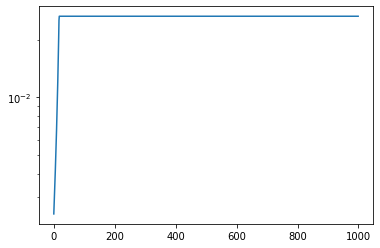

In [24]:
# G, P, A, X, Xdot = create_toy_problem_G_constraint(l = 2, k = 100, p = 200, c = 1, n_poisson=200, E0 = 30, force_simplex=True)
G, P, A, X, Xdot = create_toy_problem_G_constraint(l = 2, k = 3, p = 1, c = 1, n_poisson=200, E0 = 30, force_simplex=True)
# P0 = np.array([[1,-0.5], [1,-0.5], [1,-0.5]]).T
P0 = np.array([[1,-0.7]]).T
# P0 = P
loss = []
for i in range(1000):
    P0 = multiplicative_step_p(X, G, P0, A, positivity_bremstrahlung=True, eps=log_shift, safe=True, l2=False)
    loss.append(KLdiv(X, G@P0, A, eps=log_shift))
plt.plot(loss)
plt.yscale("log")
P0, P

In [25]:
X, G @ P

(array([[0.93699618],
        [0.29281131],
        [0.        ]]),
 array([[0.93699618],
        [0.29281131],
        [0.        ]]))

In [248]:
KLdiv(X, G@P, A, eps=log_shift)

0.0